<a href="https://colab.research.google.com/github/jsilryan/Deep-Learning-Practice/blob/master/Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Video Notebook



## 0. Importing PyTorch and setting up device-agnostic code

In [135]:
# !pip uninstall -y torch torchvision
# !pip install torch torchvision

In [136]:
import torch
from torch import nn

# PyTorch 1.10.0 +
torch.__version__

'2.0.1+cu118'

In [137]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [138]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 1. Get Data

Our dataset is a subset of the Food101 datset.

Food101 starts 101 different classes of food

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing)

Why?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [139]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data loader
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents = True, exist_ok = True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f: # Write Binary
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak, sushi data...


## 2. Becoming one with the data (data preparation and exploration)

In [140]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [141]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.


In [142]:
# Setup training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualize an Image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Open the image with Python's PIL - Pillow
5. Show the image and print metadata

Random image path: data/pizza_steak_sushi/train/sushi/268990.jpg
Image class: sushi
Image height: 512
Image width: 384


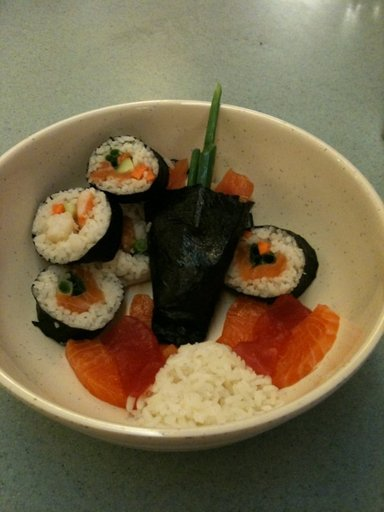

In [143]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths () -> test/pizza/1152100
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # Stem is the end of the parent folder -> Last folder before file

# 4. Open Image with PIL or read_image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 383.5, 511.5, -0.5)

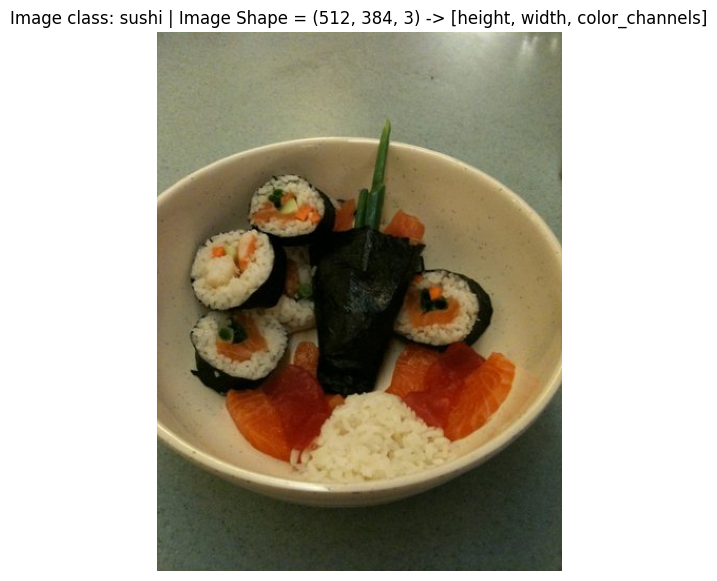

In [144]:
# Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn image into array
img_as_array = np.asarray(img)

# Plot image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image Shape = {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [145]:
img_as_array

array([[[114, 123,  96],
        [120, 129, 102],
        [121, 129, 105],
        ...,
        [115, 120,  90],
        [115, 118,  89],
        [119, 122,  93]],

       [[111, 120,  93],
        [119, 128, 101],
        [122, 130, 106],
        ...,
        [117, 122,  92],
        [115, 118,  89],
        [117, 120,  91]],

       [[110, 118,  94],
        [118, 126, 102],
        [122, 130, 107],
        ...,
        [121, 124,  95],
        [116, 119,  90],
        [115, 118,  89]],

       ...,

       [[ 84,  95,  81],
        [ 86,  97,  83],
        [ 90,  98,  83],
        ...,
        [ 52,  58,  44],
        [ 52,  58,  44],
        [ 57,  63,  49]],

       [[ 87,  95,  82],
        [ 88,  96,  83],
        [ 87,  95,  80],
        ...,
        [ 51,  57,  43],
        [ 52,  58,  44],
        [ 59,  65,  51]],

       [[ 95, 103,  90],
        [ 89,  97,  84],
        [ 82,  90,  75],
        ...,
        [ 53,  59,  45],
        [ 55,  61,  47],
        [ 63,  69,  55]]

## 3. Transforming data

Before using any form of data with PyTorch:
1. Turn the target data into tensors
  - Numerical representation of the images
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`
  - `Dataset` and `DataLoader`
  

In [146]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor

### 3.1 Transforming data with `torchvision.transforms`

Gets the images ready to be used with a model / perform data augmentation

In [147]:
# Write a transform for image
data_transform = transforms.Compose([ # Could also use nn.Sequential
    # Resize the images to 64*64
    transforms.Resize(size = (64, 64)),
    # Flip images randomly on the horizontal
    transforms.RandomHorizontalFlip(p = 0.5), # Probability
    # Turn image into Tensor
    transforms.ToTensor()
])

In [148]:
data_transform(img).dtype

torch.float32

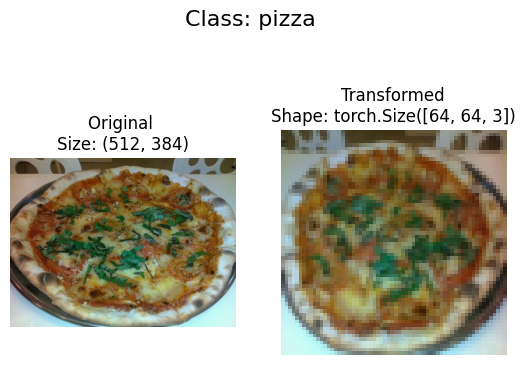

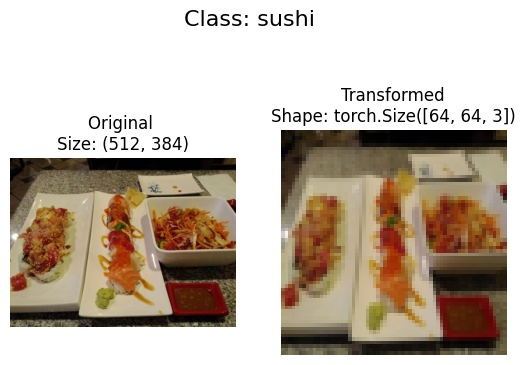

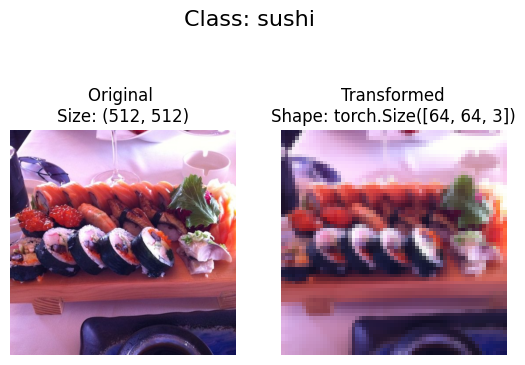

In [149]:
def plot_transformed_images(image_paths, transform, n = 3, seed = None): # n -> Number of images to transform at a time
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # Brings color channels first yet matplotlib prefers color channels last. Hence there will be change in shape -> (C, H, W) ->( H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16) # Superior title

plot_transformed_images(
    image_paths = image_path_list,
    transform = data_transform,
    n = 3,
    seed = 42
)

In [150]:
image_path_list

[PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/499605.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/887831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1245193.jpg'),
 PosixPath('data/pizza_steak_s

## 4. Option 1: Loading image data using `ImageFolder`

ImageFolder takes the data via the generic folder hierarchy of:
  - data / {main_directory} / train / {class_names} / images
  - data / {main_directory} / test / {class_names} / images

In [151]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = data_transform, # Transform for the data
    target_transform = None # Transform for the label
)

test_data = datasets.ImageFolder(
    root = test_dir,
    transform = data_transform
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [152]:
# Class Names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [153]:
# Class names as list
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [154]:
# Length
len(train_data), len(test_data)

(225, 75)

In [155]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [156]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [157]:
class_names[label]

'pizza'

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

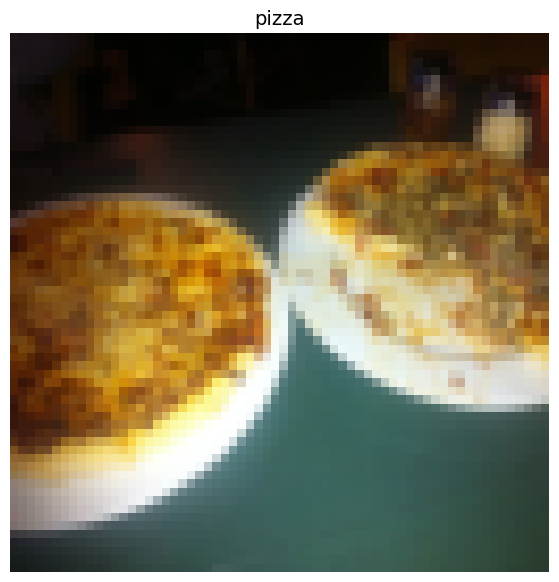

In [158]:
# Rearrange order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize = 14)

### 4.1 Turn loaded images into `DataLoader`'s

Helps turn the dataset into iterables and can customise the `batch_size` so that the model can see `batch_size` images at a time.

In [159]:
# Setup batch size
BATCH_SIZE = 1

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    num_workers = 1, # os.cpu_count() -> How many CPU Cores are used to load my data; the higher the better
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    num_workers = 1,
    shuffle = False
)

In [160]:
import os
os.cpu_count()

2

In [161]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [162]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, can change it if necessary
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading Image Data with a Custom `Dataset`

1. Want to load images from file
2. Want to get class names from Dataset
3. Want to get classes as dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset`

Cons:
* Even though I could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in writing more code, which could be error-prone or have performance-issues

All custom datasets in PyTorch subclass ... torch.utils.data.Dataset

In [163]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset # Abstract class representing a dataset -> Overwrite __getitem__ and __len__
from torchvision import transforms
from typing import Tuple, Dict, List

In [164]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

It needs a function to:
1. Get the class names using `os.scandir()` to travers a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (there might be sth wrong with the directory structure).
3. Turn the class names into a dict and a list and return them

In [165]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in os.scandir(target_directory)])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [166]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'steak'>, <DirEntry 'pizza'>]

In [167]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Finds the class folder names in a target directory. """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [168]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

Represent a map from keys (targets / labels) to data samples (images)

To create a custom dataset, I want to:

1. Subclass with `torch.utils.data.Dataset`
2. Init the subclass with a target directory (the directory I'd like to get data from), as well as a transform if I'd like to transform the data.
3. Create several attributes:
  * paths - paths of the images
  * Transform - transform I'd like to use
  * classes - a list of target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()` - to open an image
5. Overwrite the `__len__` method to retun the length of the dataset
6. Overwrite the `getitem()` method to return a given sample when passed an index                                       

In [169]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset): # all the functionalities contained in torch.utils.data.Dataset will be got for the custom class
  # 2. Initialize the custom dataset
  def __init__(self,
               targ_dir: str,
               transform = None):
    # 3. Create class attributes
    # Get all image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    """Opens an image via a path and returns it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """Returns the total number of samples."""
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label (X, y)."""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # Expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # Returns data, label (X, y)
    else:
      return img, class_idx

In [170]:
# What __getitem__() is replicating
img, label = train_data[0]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [171]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
]) # No need to manipulate its data augmentation: Orientation, shape size etc

In [172]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(
    targ_dir = train_dir,
    transform = train_transforms
)

test_data_custom = ImageFolderCustom(
    targ_dir = test_dir,
    transform = test_transforms
)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f3b49632470>,
 <__main__.ImageFolderCustom at 0x7f3b49633f70>)

In [173]:
len(train_data), len(train_data_custom)

(225, 225)

In [174]:
len(test_data), len(test_data_custom)

(75, 75)

In [175]:
train_data_custom.classes,

(['pizza', 'steak', 'sushi'],)

In [176]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [177]:
# Check for equality btn original ImageFolder Dataset and ImageFolderCustom Dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `dataset` and other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of the images line up with matplotlib

In [178]:
# 1. Create a function to take in a dataset
def display_random_images(
    dataset: torch.utils.data.Dataset,
    classes: List[str] = None,
    n: int = 10,
    display_shape: bool = True,
    seed: int = None
):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"for display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k = n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimension for plotting
    targ_image_adjust = targ_image.permute(1,2,0) # [cc, h, w] -> [h, w, cc]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

In [179]:
random.sample(range(len(train_data_custom)), k = 10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

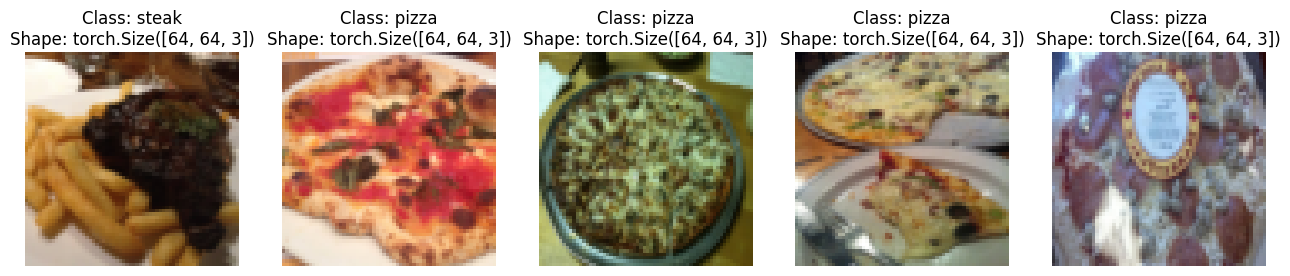

In [180]:
# display random images from the ImageFolder created Dataset
display_random_images(
    train_data,
    n = 5,
    classes = class_names,
    seed = None
)

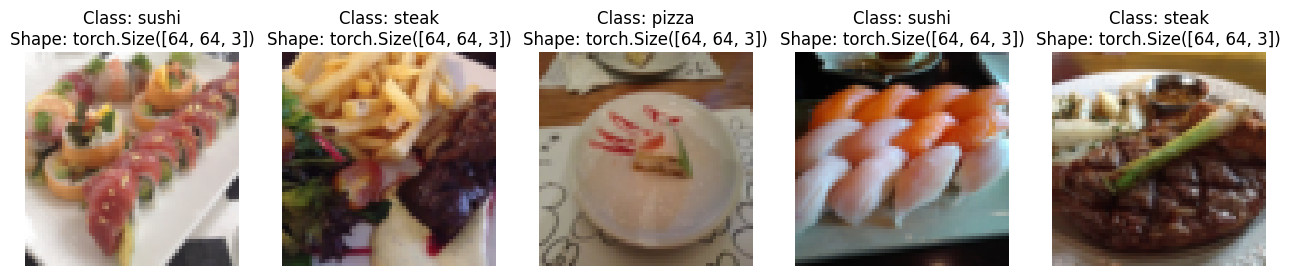

In [181]:
# Display random images from the ImagesFolderCustom Dataset
display_random_images(
    train_data_custom,
    n = 5,
    classes = class_names,
    seed = None
)

### 5.4 Turn custom loaded images into `DataLoader`'s

In [182]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(
    dataset = train_data_custom,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = True
)
test_dataloader_custom = DataLoader(
    dataset = test_data_custom,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = False
)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f3b49a3c0a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3b49a3f7c0>)

In [183]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [184]:
# Augmentation - manipulating images in some way, shape or form so that I can artificially increase the diversity of the training dataset

## 6. Other forms of transforms (Data Augmentation)

Data augmentation is the process of artificially adding diversity to the training data

In the case of image data, this may mean applying various image transformations to the training images - Looking at the samme image but from different perspective(s) -> Rotate, Shift, Zoom, Crop, Shear, Replace etc

Train State-Of-The-Art (SOTA) Models -> Trivial Augment - selects some transforms randomly and applies them to the images at random intensities

Other ways of improving:
1. Learning Rate Optimizations
2. TrivialAugment
3. Long Training
4. Random Erasing
5. Label Smoothing
6. Mixup
7. Cutmix
8. Weight decay tuning
9. FixRes mitigations
10. EMA
11. Inference Resize Tuning
12. Repeated Augmentation

In [185]:
# Trivial Augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31), # 0-31 how intense the augmentation should happen
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [186]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/499605.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg')]

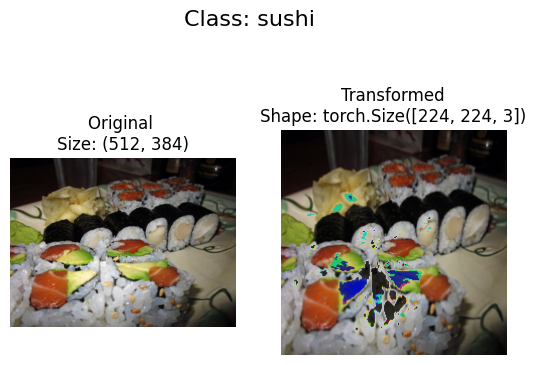

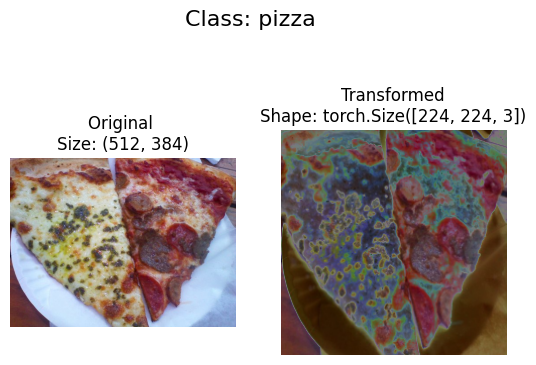

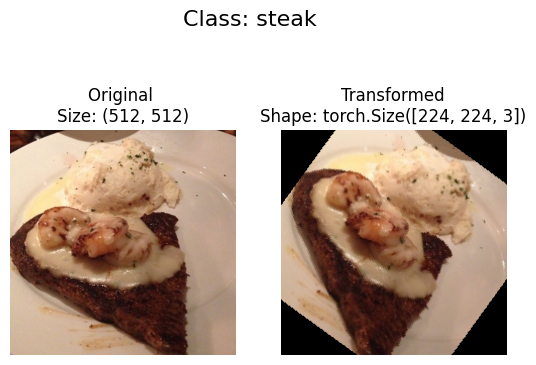

In [187]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n = 3,
    seed = None
)

## 7. Model 0: TinyVGG without data augmentation

Replicate TinyVGG architecture from the CNN Explainer website

### 7.1 Creating Transforms and Loading Data for Model 0

In [188]:
# Create simple transforms
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [189]:
# 1. Load and transform data
from torchvision.datasets import ImageFolder
train_data_simple = ImageFolder(
    root = train_dir,
    transform = simple_transform,
    target_transform = None
)

test_data_simple = ImageFolder(
    root = test_dir,
    transform = simple_transform
)

# 2. Turn datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(
    dataset = train_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)

### 7.2 Create a TinyVGG model class

In [217]:
class TinyVGG(nn.Module):
  """Model architecture copying TinyVGG from CNN Explainer."""
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int
  ) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels = input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2,
            stride = 2
        ) # Default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2,
            stride = 2
        ) # Default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), # Gets a feature vector
        nn.Linear(
            in_features = hidden_units * 13 * 13, # Will first get the error so that I can know how I should calculate it after the MaxPool returns a certain shape -> Use dummy data
            out_features = output_shape
        )
    )

  # Everytime I use nn.Module, I need to overwrite the forward method
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

    # https://horace.io/brrr_intro.html -> Make deep Learning go brr from first principles
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> will benefit from operator fusion speeding up the computational process

In [191]:
torch.manual_seed(42)
model_0 = TinyVGG(
    input_shape = 3, # Number of color channels
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [192]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
shape = image_batch.shape
last_dim = image_batch.shape[-1]
last_dim

64

In [193]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get an idea of the shapes going through the model

In [194]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size = [1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loops functions

* `train_step()` - takes in a model and a dataloader and trains the model on the dataloader.

* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [195]:
# Create train_step()
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device = device
):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1) # Not a must for me to use softmax
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [196]:
# Crate a test step
def test_step(
  model: torch.nn.Module,
  loss_fn: torch.nn.Module,
  dataloader: torch.utils.data.DataLoader,
  device = device
):
  model.eval()

  # Setup test acc and test loss
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      # Move to device
      X, y = X.to(device), y.to(device)

      # 1. Forward Pass
      test_pred = model(X)

      # 2. Calculate loss
      loss = loss_fn(test_pred, y)
      test_loss += loss.item() # Gets a single integer

      # 3. Accuracy
      test_pred_labels = torch.argmax(torch.softmax(test_pred, dim = 1), dim = 1)
      test_acc += (test_pred_labels == y).sum().item()/ len(test_pred)

    # Get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

  return test_loss, test_acc


In [197]:
# 1. Create a train function that takes in various model params + optimizers
def train_test(
    epochs,
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device = device
):
  # 2. Create empty results dictionary
  results = {
      "train_loss" : [],
      "train_acc" : [],
      "test_loss": [],
      "test_acc": []
  }
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_loss, train_acc = train_step(
      dataloader = train_dataloader,
      model = model,
      loss_fn = loss_fn,
      optimizer = optimizer,
      device = device
    )
    test_loss, test_acc = test_step(
        dataloader = test_dataloader,
        model = model,
        loss_fn = loss_fn,
        device = device
    )

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Tes acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

In [198]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 7.7 Train and evaluate `model_0`

Outside the scope of education, don't use random_seed as much since I want the model's performace to be similar regardless of the seed I use.

In [199]:
torch.manual_seed(42)
from tqdm.auto import tqdm

# Set number of epochs
EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG (
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(train_data.classes)
).to(device)

# Setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params = model_0.parameters(),
    lr = 0.001
) # Default for Adam is 0.001

# Start timer
from timeit import default_timer as timer
time_start = timer()

model_0_results = train_test(
    epochs = EPOCHS,
    model = model_0,
    train_dataloader = train_dataloader_simple,
    test_dataloader = test_dataloader_simple,
    loss_fn = loss_fn,
    optimizer = optimizer
)

# End timer
time_end = timer()
total_time = time_end - time_start
print(f"Train time on {device}: {total_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Tes acc: 0.3011
Epoch: 1
--------
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Tes acc: 0.5417
Epoch: 2
--------
Epoch: 2 | Train loss: 1.0868 | Train acc: 0.4883 | Test loss: 1.0807 | Tes acc: 0.4924
Epoch: 3
--------
Epoch: 3 | Train loss: 1.0843 | Train acc: 0.4023 | Test loss: 1.0608 | Tes acc: 0.5833
Epoch: 4
--------
Epoch: 4 | Train loss: 1.0662 | Train acc: 0.4102 | Test loss: 1.0656 | Tes acc: 0.5644
Train time on cpu: 17.538 seconds


In [200]:
model_0_results

{'train_loss': [1.106319099664688,
  1.0998046845197678,
  1.086849331855774,
  1.0843025892972946,
  1.0662314146757126],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.40234375, 0.41015625],
 'test_loss': [1.0983206431070964,
  1.06969157854716,
  1.0807159344355266,
  1.0607701937357585,
  1.0655529896418254],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

### 7.8 Plot the loss curves of `model_0`

**Loss Curve** - a way of tracking a model's progress over time -> Essentially it should go down over time

In [201]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [202]:
def plot_loss_curves(
    results: Dict[str, List[float]] # Takes in a dictionary that has a string as a key that has a list of floats
):
  """Plots training curve of the results dictionary"""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Accuracy values
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15,7))

  # Plot the loss
  plt.subplot(1 ,2, 1)
  plt.plot(epochs, loss, label = "train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

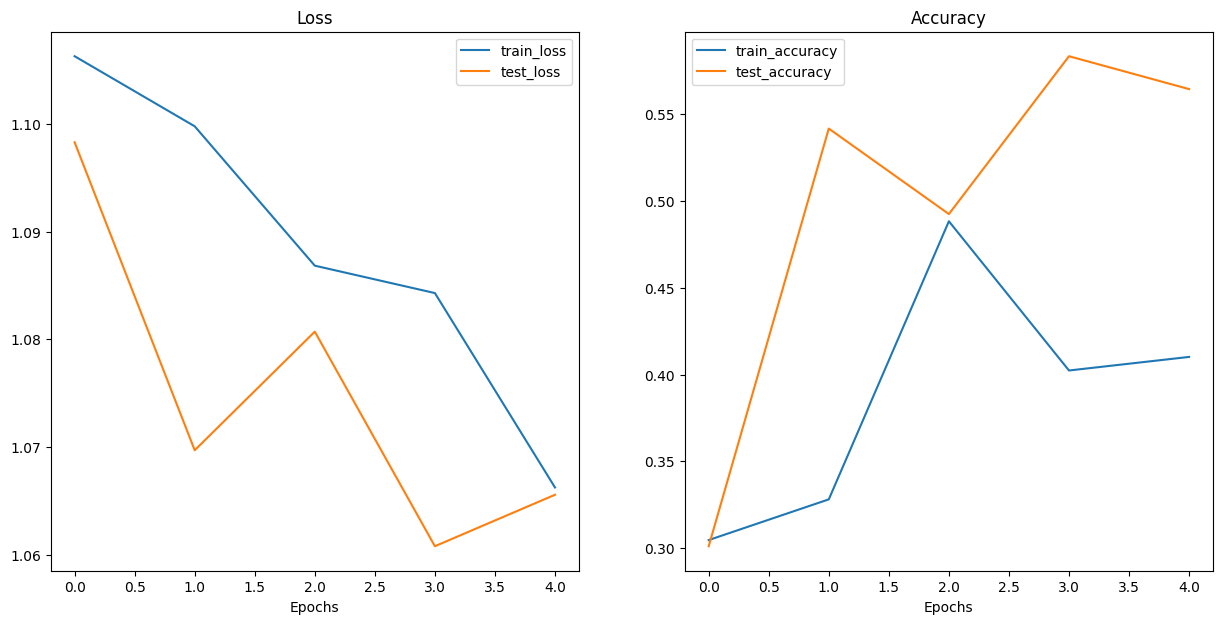

In [203]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

Loss curves are ideal to trouble shoot a model

- Underfitting -> Loss could be lower
- Overfitting -> Training loss is lower than testing loss - model is learning training data too well and it is not reflected in the testing loss. It memorizes patterns in the training data that do not generalise well with the testing data
- Just Right -> Train and test losses are similar

1. Dealing with Overfitting:
  - Get more data - expose it to more example
  - Data augmentation - increase diversity of the training dataset
  - Better data
  - Use transfer learning - take a model's pre-learned patterns from one problem and tweak it to suit my own problems
  - Simplify the course
  - Use learning rate decay - decrease learning rate as a model trains -> PyTorch LR scheduling
  - Use early stopping - stop model before it begins to overfit

3. Reduce underfitting
  - Add more layers / units to the model
  - Tweak the learning rate
  - Train for longer
  - Use transfer learning
  - Use less regularization -> Trying to prevent overfitting too much


Find a pattern between over and underfitting

## 9. Model 1: TinyVGG with Data Augmentation

### 9.1 Create transform with data augmentation


In [205]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`'s and `DataLoader` with data augmentation

In [208]:
# Turn images into dataset
from torchvision.datasets import ImageFolder
train_data_augmented = ImageFolder(
    root = train_dir,
    transform = train_transform_trivial,
    target_transform = None
)
test_data_simple = ImageFolder(
    root = test_dir,
    transform = test_transform_simple
)

In [209]:
# Turn datasets into dataloaders
import os
from torch.utils.data import DataLoader
torch.manual_seed(42)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(
    dataset = train_data_augmented,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = True
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = False
)


### 9.3 Create a TinyVGG `Model_1`

In [211]:
class TinyVGG_Model_1(nn.Module):
  def __init__(
      self,
    input_shape: int,
    hidden_units: int,
    output_shape: int
  ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels = input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 2,
            stride = 2
        )
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.maxPool2d(
            kernel_size = 2,
            stride = 2
        )
    )
    self.classifier(
        nn.Flatten(),
        nn.Linear(
            in_features = hidden_units * 13 * 13,
            out_features = output_shape
        )
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [218]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units = 10,
    output_shape = len(train_data_augmented.classes)
).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Create a loss function and an optimizer and call upon the `train_test()` to evaluate the model.

In [219]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function / criterion trying to reduce
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params = model_1.parameters(),
    lr = 0.001
)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train_test(
    model = model_1,
    train_dataloader = train_dataloader_augmented,
    test_dataloader = test_dataloader_simple,
    optimizer = optimizer,
    loss_fn = loss_fn,
    epochs = NUM_EPOCHS,
    device = device
)

# End the timer and print how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds.")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Epoch: 0 | Train loss: 1.1049 | Train acc: 0.2500 | Test loss: 1.1019 | Tes acc: 0.2604
Epoch: 1
--------
Epoch: 1 | Train loss: 1.0807 | Train acc: 0.4258 | Test loss: 1.1261 | Tes acc: 0.2604
Epoch: 2
--------
Epoch: 2 | Train loss: 1.0712 | Train acc: 0.4258 | Test loss: 1.1593 | Tes acc: 0.2604
Epoch: 3
--------
Epoch: 3 | Train loss: 1.1253 | Train acc: 0.3047 | Test loss: 1.1581 | Tes acc: 0.2604
Epoch: 4
--------
Epoch: 4 | Train loss: 1.0864 | Train acc: 0.4258 | Test loss: 1.1555 | Tes acc: 0.3333
Total training time for model_1: 10.606 seconds.


In [214]:
model_1_results

{'train_loss': [1.1049142181873322,
  1.0806865766644478,
  1.0711742341518402,
  1.1253273636102676,
  1.0864124447107315],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019279956817627,
  1.1260556777318318,
  1.1592780550320942,
  1.1580963333447774,
  1.1554851929346721],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

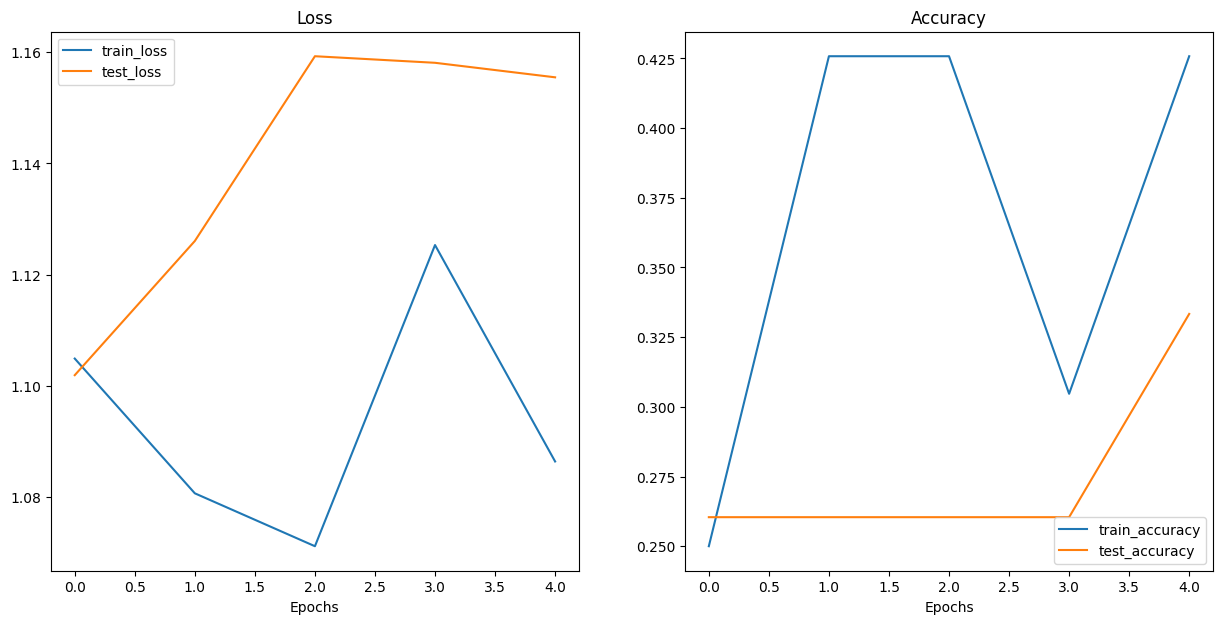

In [215]:
plot_loss_curves(model_1_results)

## 10. Compare model results

Ways to compare:
1. Hard coding
2. PyTorch + Tensorboard
3. Weights & Biases -> wandb - experiment-tracking
4. MLFlow

In [222]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099805,0.328125,1.069692,0.541667
2,1.086849,0.488281,1.080716,0.492424
3,1.084303,0.402344,1.060770,0.583333
4,1.066231,0.410156,1.065553,0.564394
